## Capacitive Sensing Background

### Voltage and current

#### Voltage
Voltage is a difference in electrical potential measured between two nodes. 


#### Current
Current is the first derivative of voltage.

\begin{align}
    i(t) = \frac{d}{dt} v(t)
\end{align}



### Kirchhoff's circuit laws


#### Kirchhof's Current Law (KCL)
The sum of all currents entering a node equals zero.

\begin{align}
    \sum_{k=1}^{n} i_{k} = 0
\end{align}

**sign convention:** Current entering a node is considered positive (+) while current exiting a node is considered negative (-).

#### Kirchhoff's Voltage Law (KVL)
The sum of voltages around a closed loop equals zero.

\begin{align}
    \sum_{k=1}^{n} v_{k} = 0
\end{align}


### The Laplace Transform



Multiplying by $\textbf{s}$ equates to derivation in the time domain. 

\begin{align}
    & \textbf{s} = \frac{d}{dt} \\
        & \frac{1}{\textbf{s}} = \int dt
\end{align}

### Passive components

#### Resistors
Resistance is the opposition of current flow across a conductor. All conductors have an intrinsic resistance. *Resistors* are passive devices of a known resistance that restrict current flow. Resistance is determined by the conductor's *resistivity*, $\rho$, linear length, *l*, and cross-sectional area, $A$, as shown in the equation below.

\begin{align}
    R = \rho \frac{l}{A}
\end{align}

\begin{align}
    \text{Time domain: } & i(t) = \frac{1}{R} v(t) \\
    \text{Laplace domain: } & I(\textbf{s}) = \frac{1}{R} V(\textbf{s})
\end{align}


Resistance can also be expressed in terms of *conductivity*, $G$, where $ G = R^{-1}$.

\begin{align}
    \text{Time domain: } & i(t) = G v(t) \\
    \text{Laplace domain: } & I(\textbf{s}) = G V(\textbf{s})
\end{align}

#### Capacitors

\begin{equation}
    C = \epsilon_{0} \epsilon \frac{A}{d}
\end{equation}

\begin{align}
    i(t) &= C \frac{d}{dt} v(t) \\
    I(\textbf{s}) &= C \textbf{s} V(\textbf{s})
\end{align}


### Current between nodes

#### Resistors

<div><img src="Resources/Resistor_Nodes.svg" width="200"/></div>

\begin{equation}
    i_{1 \rightarrow 2}(t) = \frac{1}{R} \left(v_{1}(t) - v_{2}(t)\right)
\end{equation}

\begin{equation}
    I_{1 \rightarrow 2}(\textbf{s}) = \frac{1}{R} \left(V_{1}(\textbf{s}) - V_{2}(\textbf{s})\right)
\end{equation}

#### Capacitors

<div><img src="Resources/Capacitor_Nodes.svg" width="200"/></div>

\begin{equation}
    i_{1 \rightarrow 2}(t) = C \left(\frac{d}{dt} v_{1}(t) - \frac{d}{dt} v_{2}(t)\right)
\end{equation}

\begin{equation}
    I_{1 \rightarrow 2}(\textbf{s}) = C \textbf{s} \left(V_{1}(\textbf{s}) - V_{2}(\textbf{s})\right)
\end{equation}


## Simple RC Circuit






\begin{equation}
    V_{out}(\textbf{s}) = V_{in}(\textbf{s})\frac{1}{RC \textbf{s} + 1}
\end{equation}




<IPython.core.display.Javascript object>


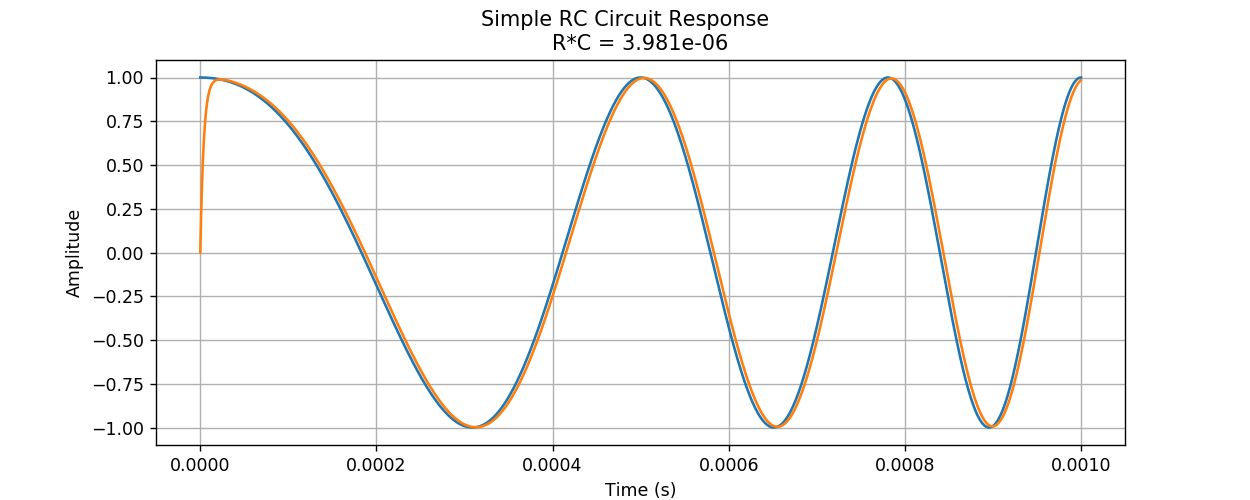

interactive(children=(Dropdown(description='Input', options=(('Pulse', <function pulse at 0x000000000A9B5A60>)…

In [2]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

fig, ax = plt.subplots(1, figsize=(10, 4))

def pulse(t1, dt=1e-6, duty=0.5):
    t = np.arange(0, t1, dt)
    u = np.ones(t.shape)
    u[t>=duty*t1] = 0
    return u, t

def sine(t1, dt=1e-6, f0=1000.0, phase=0.0):
    t = np.arange(0, t1, dt)
    u = np.sin(2*np.pi*f0*t + phase)
    return u, t

def sweep(t1, dt=1e-6, f0=1000.0, f1=5000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def simpleRC(wav, R, C, t1):
    sys = TransferFunction([1], [(R*C), 1])
    u, t = wav(t1)
    tout, y, x = lsim(sys, u, t)
    
    ax.clear()
    plt.suptitle("Simple RC Circuit Response")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'R*C = {R*C:.3e}')
    ax.plot(t, u)
    ax.plot(tout, y)
    plt.grid()
    plt.show()


waveform = widgets.Dropdown(
    options=[('Pulse', pulse), ('Sine', sine), ('Sweep', sweep)],
    description='Input'
)
cap = widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='C'
)
res = widgets.FloatLogSlider(
    value=1e-11,
    base=10,
    min=3,
    max=7,
    step=0.2,
    description='R'
)
t1 = widgets.BoundedFloatText(
    min=1e-5,
    max=1e-2,
    value=1e-3,
    step=1e-5,
    description="End time")

widgets.interactive(simpleRC, wav=waveform, R=res, C=cap, t1=t1)

## Realistic Capacitive Touch Circuit



## Differential Capacitive Sensing

### Localizing Touch Along a Conductor


\begin{align}
    Ax=b
\end{align}

\begin{align}
    \begin{bmatrix}
        G_{A} && -G_{A} && 0 && 0 && 0 && 1 && 0 \\
        -G_{A} && (G_{A} + G_{K}x + C_{P_A}\textbf{s}) && -G_{K}x && 0 && 0 && 0 && 0 \\
        0 && -G_{K}x && (G_{K} + C_{t}\textbf{s}) && -G_{K}(1-x) && 0 && 0 && 0 \\
        0 && 0 && -G_{K}(1-x) && (G_{K}(1-x) + G_{B} + C_{P,B}\textbf{s}) && -G_{B} && 0 && 0 \\
        0 && 0 && 0 && -G_{B} && G_{B} && 0 && 1 \\
        1 && 0 && 0 && 0 && 0 && 0 && 0 \\
        0 && 0 && 0 && 0 && 1 && 0 && 0
    \end{bmatrix}
    \times 
    \begin{bmatrix}
        v_{A} \\
        o_{A} \\
        e_{1} \\
        o_{B} \\
        v_{B} \\
        i_{v,A}\\
        i_{v,B}
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        0 \\
        V_{A} \\
        V_{B}
    \end{bmatrix}
\end{align}





In [3]:
from scipy.signal import TransferFunction

def createSystem(x, Ct, RA=1e6, RB=1e6, RK=5e5, CpA=20e-12, CpB=20e-12):
    """
    Create the single-input, multiple-output CTS transfer function
    System polynomials are computed using MATLAB
    """
    
    RK0 = RK*x
    RK1 = RK*(1-x)
    
    # Find the system numerator coefficient array
    # sysA
    n00 = RA + RB + RK0 + RK1
    n01 = CpB*RB*RK0 + CpB*RB*RK1 + Ct*RB*RK0 + Ct*RK0*RK1
    n02 = CpB*Ct*RB*RK0*RK1
    
    # sysB
    n10 = RA + RB + RK0 + RK1
    n11 = CpA*RA*RK0 + CpA*RA*RK1 + Ct*RA*RK1 + Ct*RK0*RK1
    n12 = CpA*Ct*RA*RK0*RK1
    
    num = [[n02, n01, n00], [n12, n11, n10]]
    
    # Find the system denomonator coefficient array
    d0 = RA + RB + RK0 + RK1 
    d1 = CpA*RA*RB + CpB*RA*RB + Ct*RA*RB + CpA*RA*RK0 + CpA*RA*RK1 + CpB*RB*RK0 + CpB*RB*RK1 + Ct*RA*RK1 + Ct*RB*RK0 + Ct*RK0*RK1
    d2 = CpA*CpB*RA*RB*RK0 + CpA*CpB*RA*RB*RK1 + CpA*Ct*RA*RB*RK0 + CpB*Ct*RA*RB*RK1 + CpA*Ct*RA*RK0*RK1 + CpB*Ct*RB*RK0*RK1
    d3 = CpA*CpB*Ct*RA*RB*RK0*RK1
    
    den = [d3, d2, d1, d0]
    
    sys = TransferFunction(num, den)
    
    return sys


<IPython.core.display.Javascript object>


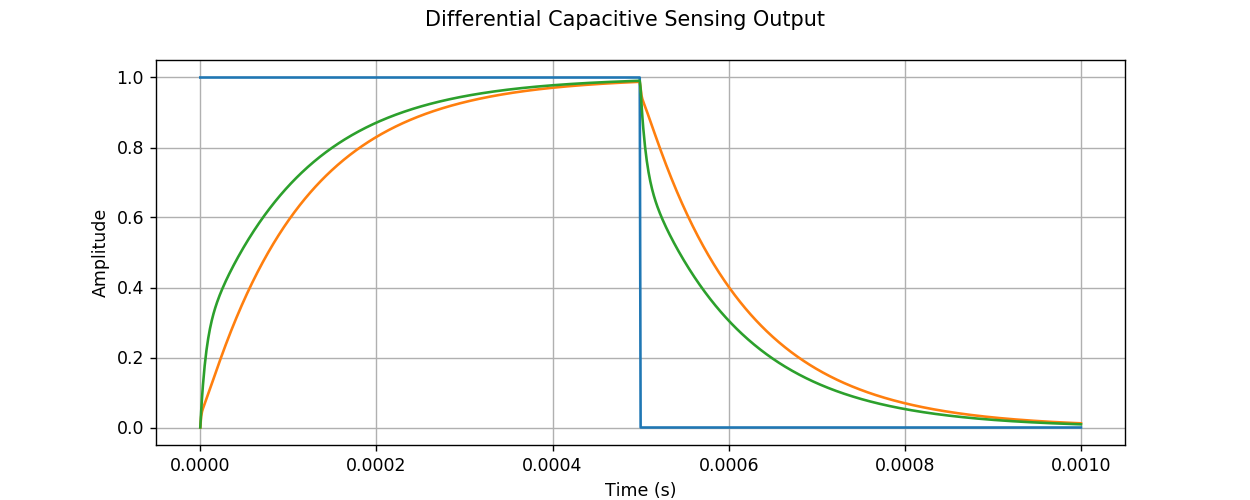

interactive(children=(Dropdown(description='Input', options=(('Pulse', <function pulse at 0x0000000009683BF8>)…

In [4]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

fig, ax = plt.subplots(1, figsize=(10, 4))

def pulse(t1, dt=1e-6, duty=0.5):
    t = np.arange(0, t1, dt)
    u = np.ones(t.shape)
    u[t>=duty*t1] = 0
    return u, t

def sine(t1, dt=1e-6, f0=1000.0, phase=0.0):
    t = np.arange(0, t1, dt)
    u = np.sin(2*np.pi*f0*t + phase)
    return u, t

def sweep(t1, dt=1e-6, f0=1000.0, f1=5000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def dcs(wav, x, Ct, t1):
    sys = createSystem(x, Ct)
    u, t = wav(t1)
    tout, y, x = lsim(sys, u, t)
    
    ax.clear()
    plt.suptitle("Differential Capacitive Sensing Output")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('')
    ax.plot(t, u)
    ax.plot(tout, y)
    plt.grid()
    plt.show()


waveform = widgets.Dropdown(
    options=[('Pulse', pulse), ('Sine', sine), ('Sweep', sweep)],
    description='Input'
)
ct = widgets.FloatLogSlider(
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='Ct'
)
pos = widgets.FloatSlider(
    value=.3,
    min=0,
    max=1,
    step=0.01,
    description='x'
)
t1 = widgets.BoundedFloatText(
    min=1e-5,
    max=1e-2,
    value=1e-3,
    step=1e-5,
    description="End time")

widgets.interactive(dcs, wav=waveform, x=pos, Ct=ct, t1=t1)

<IPython.core.display.Javascript object>


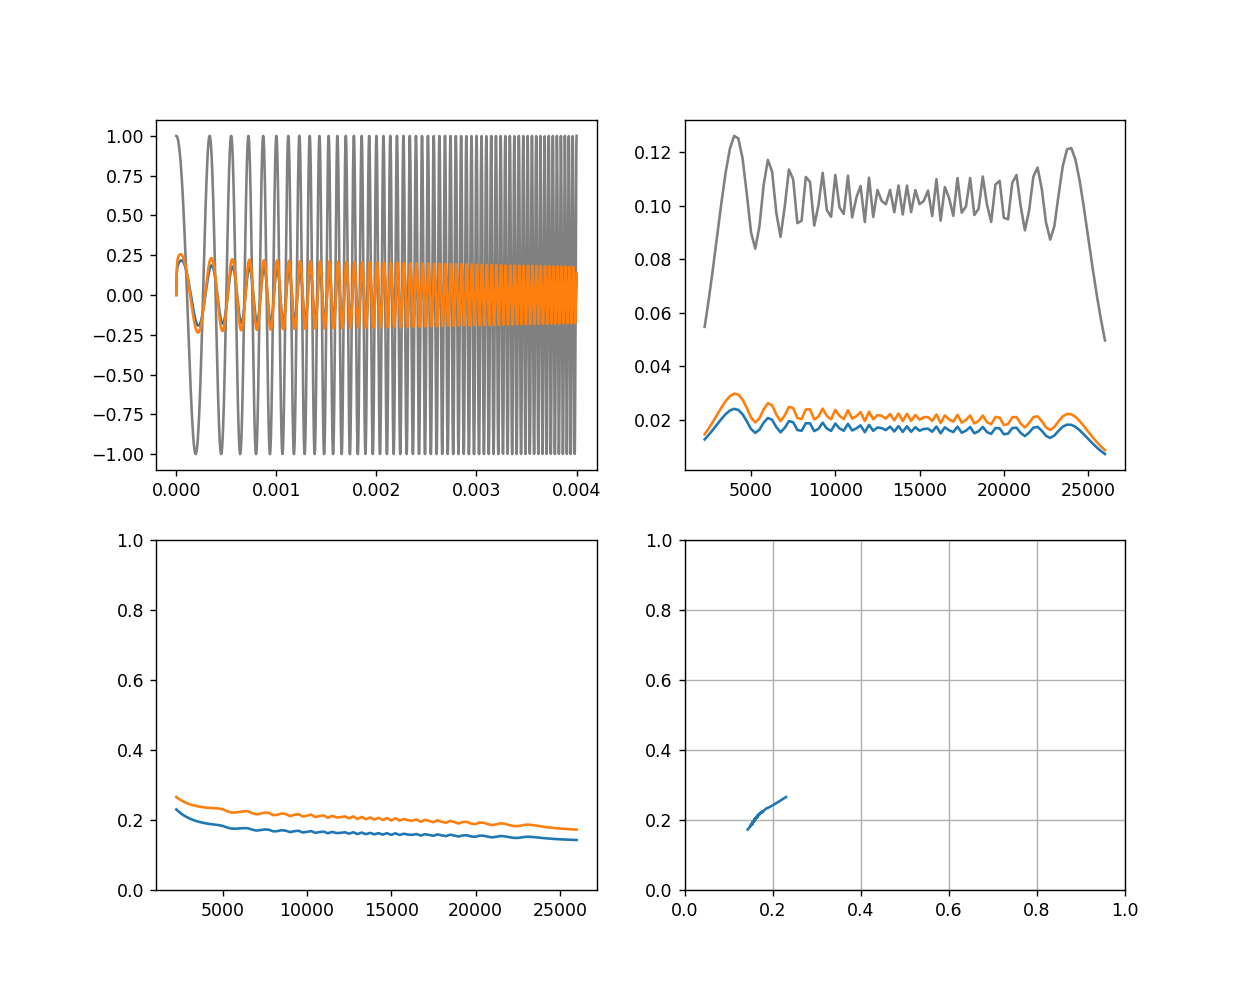

interactive(children=(FloatSlider(value=0.3, description='x', max=1.0, step=0.01), FloatLogSlider(value=1e-11,…

In [10]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def dcsFFT(x, Ct):
    sys = createSystem(x=x, Ct=Ct)
    t1 = 4e-3
    u, t = sweep(t1)
    tout, y, x = lsim(sys, u, t)

    dt = 1e-6
    f0 = 2000.0
    f1 = 26000.0
    f = np.fft.fftfreq(len(u), dt)
    f = f[range(int(len(f)/2))]
    fidx = (f >= f0) & (f <= f1)

    ufft = abs(np.fft.fft(u))/len(u) # Normalize amplitude
    ufft = 2*ufft[range(int(len(u)/2))] # Exclude sampling frequency

    yfft = abs(np.fft.fft(y, axis=0))/len(y) # Normalize amplitude
    yfft = 2*yfft[range(int(len(y)/2))] # Exclude sampling frequency

    gainA = np.divide(yfft[fidx,0], ufft[fidx])
    gainB = np.divide(yfft[fidx,1], ufft[fidx])

    for a in ax.flat:
        a.clear()
    
    ax[0,0].plot(t, u, color='gray')
    ax[0,0].plot(t, y[:,0], color='tab:blue')
    ax[0,0].plot(t, y[:,1], color='tab:orange')
    ax[0,1].plot(f[fidx], ufft[fidx], color='gray')
    ax[0,1].plot(f[fidx], yfft[fidx])
    ax[1,0].plot(f[fidx], gainA, color='tab:blue')
    ax[1,0].plot(f[fidx], gainB, color='tab:orange')
    ax[1,0].set_ylim(0, 1)
    ax[1,1].plot(gainA, gainB)
    ax[1,1].set_xlim(0, 1)
    ax[1,1].set_ylim(0, 1)
    plt.grid()
    plt.show()

ct = widgets.FloatLogSlider(
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='Ct'
)
pos = widgets.FloatSlider(
    value=.3,
    min=0,
    max=1,
    step=0.01,
    description='x'
)

widgets.interactive(dcsFFT, wav=waveform, x=pos, Ct=ct)

## Manifold Generation




<IPython.core.display.Javascript object>


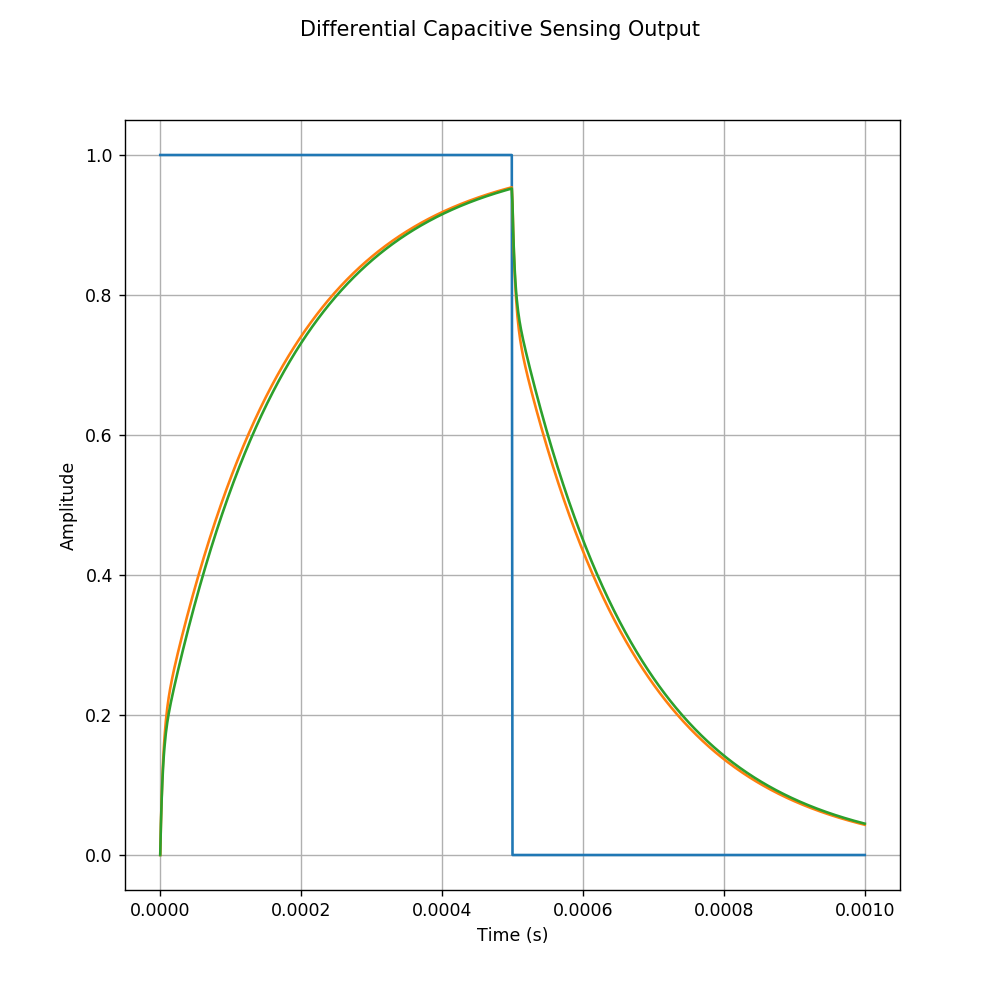

interactive(children=(FloatLogSlider(value=1000000.0, continuous_update=False, description='RA', max=7.0, min=…

In [16]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def dcsManifold(RA=1e6, RB=1e6, RK=1e6, CpA=20e-12, CpB=20e-12):
    x = np.arange(0, 1.01, 0.1)
    Ct = np.arange(0, 2.01e-10, 20e-12)

    manifold = np.zeros((len(x), len(Ct), 2))

    for i, xval in enumerate(x):
        for j, Ctval in enumerate(Ct):
            sys = createSystem(x=xval, Ct=Ctval, RA=RA, RB=RB, RK=RK, CpA=CpA, CpB=CpB)
            t1 = 4e-3
            u, t = sweep(t1)
            tout, y, x = lsim(sys, u, t)

            dt = 1e-6
            f0 = 2000.0
            f1 = 26000.0
            f = np.fft.fftfreq(len(u), dt)
            f = f[range(int(len(f)/2))]
            fidx = (f >= f0) & (f <= f1)

            ufft = abs(np.fft.fft(u))/len(u) # Normalize amplitude
            ufft = 2*ufft[range(int(len(u)/2))] # Exclude sampling frequency

            yfft = abs(np.fft.fft(y, axis=0))/len(y) # Normalize amplitude
            yfft = 2*yfft[range(int(len(y)/2))] # Exclude sampling frequency

            gainA = np.divide(yfft[fidx,0], ufft[fidx])
            gainB = np.divide(yfft[fidx,1], ufft[fidx])

            manifold[i,j,0] = np.mean(gainA)
            manifold[i,j,1] = np.mean(gainB)

    ax.clear()
    ax.plot(manifold[:,:,0], manifold[:,:,1], '--', color='gray')
    ax.plot(manifold[:,:,0].T, manifold[:,:,1].T, '-', color='gray')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.grid()
    plt.show()


ra = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RA'
)

rb = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RB'
)

rk = widgets.FloatLogSlider(
    continuous_update=False,
    value=5e5,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RK'
)

cpa = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.1,
    description='CpA'
)

cpb = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.1,
    description='CpB'
)

widgets.interactive(dcsManifold, RA=ra, RB=rb, RK=rk, CpA=cpa, CpB=cpb)

## Resistor Networks



